In [28]:
import pandas as pd

In [29]:
df = pd.read_csv("train.csv")

In [30]:
df.sample(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.0000,NaN,S
404,405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,NaN,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S


In [31]:
df[df['SibSp'] > 0].sample(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S


In [32]:
train_data = df[['Survived','Pclass','Sex']]

In [33]:
train_data.sample(n=3)

,Survived,Pclass,Sex
614,0,3,male
391,1,3,male
62,0,1,male


In [34]:
train_data['Sex'].replace(['male','female'],[0,1],inplace=True)

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [35]:
train_data.sample(n=3)

,Survived,Pclass,Sex
85,1,3,1
280,0,3,0
156,1,3,1


In [36]:
train_data.sample(n=3).as_matrix()

array([[1, 2, 1],
       [0, 1, 0],
       [0, 1, 0]], dtype=int64)

In [37]:
%matplotlib inline

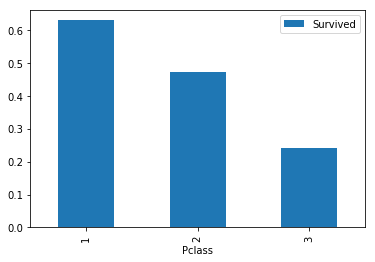

In [38]:
train_data[['Pclass','Survived']].groupby('Pclass').mean().plot.bar()

In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [40]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [41]:
df['Embarked'].mode().iloc[0]

'S'

In [42]:
df.Embarked.fillna(str(df['Embarked'].mode().iloc[0]),inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [44]:
df.Embarked[61]

'S'

In [45]:
df[['Embarked','Survived']].groupby('Embarked').count()

,Survived
Embarked,
C,168
Q,77
S,646


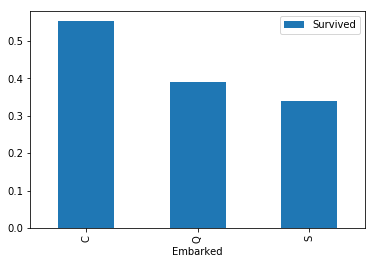

In [46]:
df[['Embarked','Survived']].groupby('Embarked').mean().plot.bar()

In [47]:
df[df['Age']<16][['Age','Survived']].mean()

Age         6.369518
Survived    0.590361
dtype: float64

In [48]:
df[df['Age']>=16][['Age','Survived']].mean()

Age         32.767829
Survived     0.381933
dtype: float64

In [49]:
df.loc[df['Age']<16,'isChild'] = 1
df.loc[df['Age']>=16,'isChild'] = 0

In [50]:
df.sample(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isChild
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S,0.0
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C,0.0
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S,0.0


In [51]:
df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

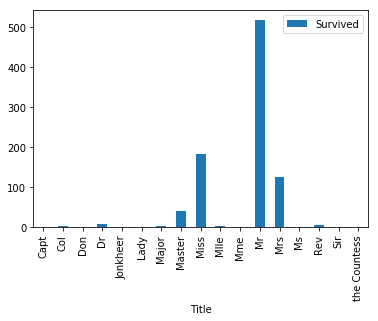

In [52]:
df.loc[:,['Title','Survived']].groupby('Title').count().plot.bar()

In [56]:
df['Title'] = df.loc[:, 'Title'].apply(lambda x: 0 if x == 'Mr' else 1 if x == 'Miss' else 2 if x == 'Ms' else 3)

In [57]:
df.sample(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isChild,Title
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5,NaN,Q,NaN,3
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0,NaN,S,1.0,3
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.00,1,0,113773,53.1,D30,S,0.0,3


In [61]:
df.loc[:,'Fare'].isnull().sum()

0

In [62]:
train_data = df.loc[:, ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]  # type:DataFrame
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
train_data['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
train_data['Title'] = train_data.loc[:, 'Title'].apply(
    lambda x: 0 if x == 'Mr' else 1 if x == 'Miss' else 2 if x == 'Ms' else 3 if x == 'Master' else 4)


In [66]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Title       0
dtype: int64